[View in Colaboratory](https://colab.research.google.com/github/sabumjung/Tensorflow/blob/master/%EC%95%88%EB%85%95%ED%95%98%EC%84%B8%EC%9A%94,_Colaboratory%EC%9E%85%EB%8B%88%EB%8B%A4.ipynb)

 ## Colaboratory에 오신 것을 환영합니다!

Colaboratory는 텍스트, 코드, 코드 출력을 하나의 공동작업 문서로 통합해 주는 데이터 분석 도구입니다.

In [0]:
print('Hello, Colaboratory!')

Hello, Colaboratory!


 Colaboratory를 사용하면 클릭 한 번만으로 사용 중인 브라우저에서 텐서플로우 코드를 실행할 수 있습니다. 아래의 예에서는 두 개의 행렬을 추가합니다.

$\begin{bmatrix}
  1. & 1. & 1. \\
  1. & 1. & 1. \\
\end{bmatrix} +
\begin{bmatrix}
  1. & 2. & 3. \\
  4. & 5. & 6. \\
\end{bmatrix} =
\begin{bmatrix}
  2. & 3. & 4. \\
  5. & 6. & 7. \\
\end{bmatrix}$

In [0]:
import tensorflow as tf
import numpy as np

with tf.Session():
  input1 = tf.constant(1.0, shape=[2, 3])
  input2 = tf.constant(np.reshape(np.arange(1.0, 7.0, dtype=np.float32), (2, 3)))
  output = tf.add(input1, input2)
  result = output.eval()

result

array([[ 2.,  3.,  4.],
       [ 5.,  6.,  7.]], dtype=float32)

 Colaboratory에는 [matplotlib](https://matplotlib.org/)와 같이 널리 사용되는 라이브러리가 포함되어 시각화를 단순화할 수 있습니다.

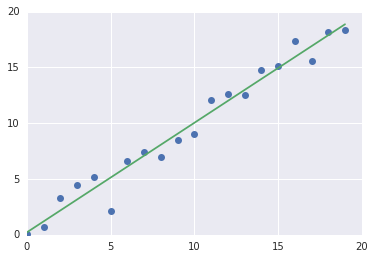

In [0]:
import matplotlib.pyplot as plt

x = np.arange(20)
y = [x_i + np.random.randn(1) for x_i in x]
a, b = np.polyfit(x, y, 1)
plt.plot(x, y, 'o', np.arange(20), a*np.arange(20)+b, '-');

 Colaboratory는 Google Cloud BigQuery와 함께 사용할 수 있습니다.

[샘플 BigQuery 노트](/notebooks/bigquery.ipynb).